## Baseline Modeling
- model : Linear Regression

In [71]:
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# model
from sklearn.linear_model import LinearRegression

# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# visualization
import matplotlib.pyplot as plt 
from sklearn.metrics import PredictionErrorDisplay

### cross_val_score 로 교차검증

In [39]:
# q2 데이터로 훈련 및 테스트 진행함
df = pd.read_csv('dataframes/selected_df_q2.csv')
features = df.loc[:, df.columns != 'interest rate']
target = df['interest rate'].values

model = LinearRegression()

neg_mse_scores = cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=10, error_score='raise')
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [ -1.62  -1.44 -11.24 -27.93  -0.99  -3.88  -2.32  -6.96  -7.08 -22.88]
 5 folds 의 개별 RMSE scores :  [1.27 1.2  3.35 5.29 1.   1.97 1.52 2.64 2.66 4.78]
 5 folds 의 평균 RMSE : 2.568 


### Cross Validation
1. 예측 결과 시각화
2. MAE, MSE, RMSE 계산

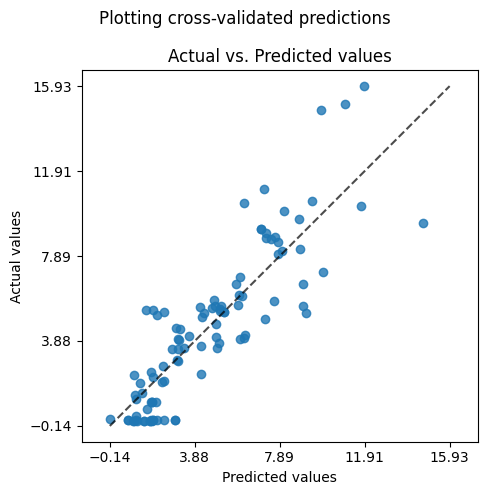

In [73]:
# cross_val_pred()로 개별 예측 결과를 추출하고 평가 지표 점수를 계산하겠다.

df = pd.read_csv('dataframes/selected_df_q2.csv')
features = df.loc[:, (df.columns != 'interest rate') & (df.columns != 'date')]
target = df['interest rate'].values

model = LinearRegression()

y_pred = cross_val_predict(model, features, target, cv=500)


fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
PredictionErrorDisplay.from_predictions(
    target,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=ax,
    random_state=0,
)
ax.set_title("Actual vs. Predicted values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.savefig('images/baseline_pred.png')

In [90]:
# 예측 실제 비교 
from random import sample
max = len(target)
idx_list = sorted(sample(range(0,max),5))

for idx in idx_list :
    print(f'Prediction : {round(y_pred[idx],2)}, Acutal : {target[idx]}')

Prediction : 5.81, Acutal : 6.58
Prediction : 7.83, Acutal : 5.48
Prediction : 7.67, Acutal : 8.8
Prediction : 7.21, Acutal : 8.35
Prediction : 1.81, Acutal : 0.08


In [91]:
# 평가 지표 점수 계산
import evaluation
from sklearn.metrics import r2_score
print(f'MAE : {evaluation.mae(y_pred, target)}')
print(f'MSE : {evaluation.mse(y_pred, target)}')
print(f'RMSE : {evaluation.rmse(y_pred, target)}')
print(f'R2 : {r2_score(target, y_pred)}')

MAE : 1.376015348320109
MSE : 3.180164238054441
RMSE : 1.7833014994819134
R2 : 0.7604541557984273


### 실제 추론
1. Fred api에서 데이터 가져옴
2. 업데이트 된 데이터로 실제 금리 예측
3. 업데이트 되지 않은 데이터는 직전 데이터를 사용

In [ ]:
model = LinearRegression().fit(X=features, y=target)
